**Word Embeddings and Visualizations with GloVe and t-SNE**

This notebook experiments with GloVe word embeddings and their geometric relationship.

In [ ]:
# 1) Download & unzip (50-dimension example)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip glove.6B.50d.txt

In [34]:
# import gloVe model

import numpy as np

def load_glove(path="glove.6B.50d.txt"):
    embeddings = {}
    with open(path, encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vec  = np.asarray(parts[1:], dtype=np.float32)
            embeddings[word] = vec
    print(f"Loaded {len(embeddings)} word vectors.")
    return embeddings

glove50d = load_glove()
for k, v in glove50d.items():
    glove50d[k] = v / np.linalg.norm(v)




Loaded 400000 word vectors.


In [9]:
# Reducing dimensionality of embeddings to 2D so we can plot them
from sklearn.manifold import TSNE

def reduce_to_2d(embeddings_index, n_words=20000):
    words = list(embeddings_index.keys())[:n_words]
    vectors = np.array([embeddings_index[word] for word in words])

    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(vectors)

    reduced_embeddings = dict(zip(words, reduced_vectors))
    return reduced_embeddings

# Reduce dimensionality
glove_embeddings_2d = reduce_to_2d(glove50d, n_words=15000)

In [10]:
def manhattan_distance(vector1, vector2):
    return sum(abs(a - b) for a, b in zip(vector1, vector2))

def find_closest_word(embeddings, target_vector):
    min_distance = float('inf')
    closest_word = None

    for word, vector in embeddings.items():
        distance = manhattan_distance(target_vector, vector)
        if distance < min_distance:
            min_distance = distance
            closest_word = word
    return closest_word

In [13]:
!pip install seaborn

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

def plot_embedding_vectors(vectors):
    fig, ax = plt.subplots()

    # Plot the points
    ax.scatter([v[0] for v in vectors[:3]], [v[1] for v in vectors[:3]], c='blue', label='Words', marker='o')
    ax.scatter(vectors[3][0], vectors[3][1], c='red', label='Result Vector', marker='x')
    ax.scatter(vectors[4][0], vectors[4][1], c='green', label='Closest Word', marker='s')

    # Draw arrows
    ax.arrow(vectors[1][0], vectors[1][1], vectors[0][0] - vectors[1][0], vectors[0][1] - vectors[1][1],
             head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    ax.arrow(vectors[2][0], vectors[2][1], vectors[3][0] - vectors[2][0], vectors[3][1] - vectors[2][1],
             head_width=0.05, head_length=0.05, fc='blue', ec='blue')

    # Label points
    labels = [word1, word2, word3, 'Result', closest_word]
    for i in range(len(vectors)):
        ax.text(vectors[i][0], vectors[i][1], labels[i], fontsize=12, ha='right')

    # Legend
    ax.legend()

    plt.show()

For the operation: math + scientist - science
The result vector is closest to the embedding: math


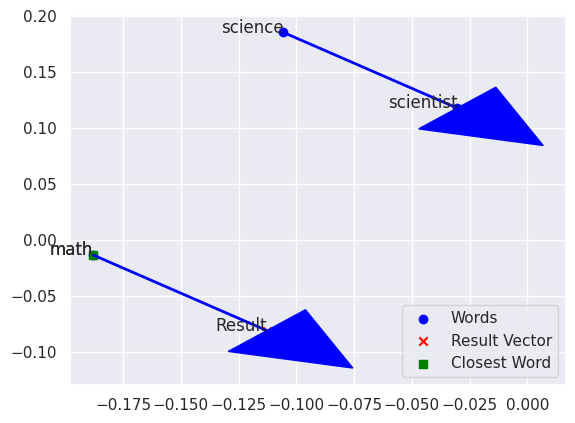

In [37]:
embeddings = glove50d
word1 = 'scientist'
word2 = 'science'
word3 = 'math'

vector1 = embeddings[word1]
vector2 = embeddings[word2]
vector3 = embeddings[word3]

result_vector = vector1 - vector2 + vector3
closest_word = find_closest_word(embeddings, result_vector)

embedding_vectors = [vector1, vector2, vector3, result_vector, embeddings[closest_word]]

print(f'For the operation: {word3} + {word1} - {word2}')
print(f'The result vector is closest to the embedding: {closest_word}')

plot_embedding_vectors(embedding_vectors)

For the operation: cold - hot + dark
The result vector is closest to the embedding: dark


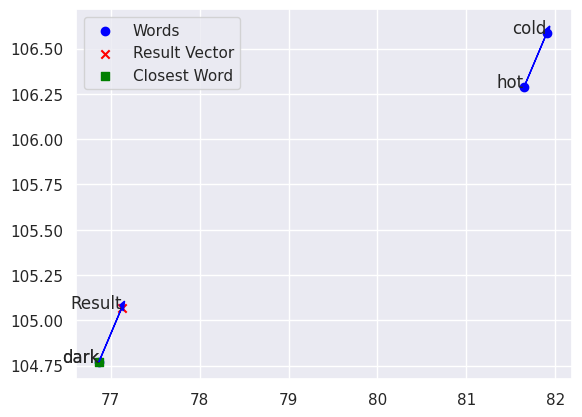

In [33]:
embeddings = glove_embeddings_2d
word1 = 'cold'
word2 = 'hot'
word3 = 'dark'

vector1 = embeddings[word1]
vector2 = embeddings[word2]
vector3 = embeddings[word3]

result_vector = vector1 - vector2 + vector3
closest_word = find_closest_word(embeddings, result_vector)

embedding_vectors = [vector1, vector2, vector3, result_vector, embeddings[closest_word]]

print(f'For the operation: {word1} - {word2} + {word3}')
print(f'The result vector is closest to the embedding: {closest_word}')


# The space is a little sparse, so we perform a quick linear transformation
# to reduce the sparsity whilst preserving relationships between vectors.
lin_transformation = np.array([[1.6, 1], [1, 1.6]])
vectors = embedding_vectors

# Scale the vectors by the matrix
scaled_vectors = [np.matmul(lin_transformation, vector) for vector in vectors]

plot_embedding_vectors(scaled_vectors)

In [44]:
embeddings = glove50d
target = embeddings['kitchen'] - embeddings['chef'] + embeddings['soldier']

closest_word = find_closest_word(embeddings, target)
print(f'The closest word to {target} is {closest_word}')

The closest word to [ 0.03880269 -0.09592437  0.23313881 -0.25564384  0.38141578  0.09330509
  0.07284156  0.0712143  -0.0189666  -0.37183034 -0.06687069 -0.25949746
  0.03752893 -0.09222545  0.01188632  0.02753875 -0.2937425   0.10044498
  0.01043142  0.05534183  0.00846441  0.23429638 -0.11474238 -0.15915549
  0.09452225 -0.32475552 -0.00147042  0.04325542  0.37710774 -0.00358459
  0.59564763 -0.18964949 -0.11951444 -0.01914956  0.01420616  0.4352128
  0.20258243 -0.25074008  0.08056036 -0.01332765  0.00547075 -0.16417027
  0.03613632  0.03104769  0.24698369  0.00874832  0.05153764 -0.13978691
 -0.06509046 -0.29435608] is fire
